In [61]:
import pandas as pd
import numpy as np
import re
from arcgis.features import FeatureLayer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Data_Lv3_UMDOTS_Escooters.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,CREATED,START,END,DISTANCE,RIDE_ID,CUSTOMER_ID,MINUTES,VEHICLE_TYPE,PATH,TIMESTAMPS,START LONG,START LAT,END LONG,END LAT
0,0,0,2020-10-03 03:32:15+00:00,2020-10-03 03:32:15+00:00,2020-10-03 03:32:46+00:00,0.008,3135665,193964,1,Scooter,"{\n ""coordinates"": [\n [\n -76.934163...","[\n ""2020-10-03T03:32:14Z"",\n ""2020-10-03T03...",-76.934163,38.990656,-76.934285,38.990739
1,1,1,2020-10-03 03:07:39+00:00,2020-10-03 03:07:39+00:00,2020-10-03 03:37:06+00:00,1.062,3135395,542947,30,Scooter,"{\n ""coordinates"": [\n [\n -76.938180...","[\n ""2020-10-03T03:07:46Z"",\n ""2020-10-03T03...",-76.938181,38.982087,-76.949165,38.992849
2,2,2,2020-10-03 03:17:05+00:00,2020-10-03 03:17:05+00:00,2020-10-03 03:24:24+00:00,0.847,3135503,517321,8,Scooter,"{\n ""coordinates"": [\n [\n -76.937599...","[\n ""2020-10-03T03:17:12Z"",\n ""2020-10-03T03...",-76.937600,38.979613,-76.933335,38.992676
3,3,3,2020-10-03 02:24:58+00:00,2020-10-03 02:24:58+00:00,2020-10-03 03:11:56+00:00,3.447,3134955,578051,47,Scooter,"{\n ""coordinates"": [\n [\n -76.943553...","[\n ""2020-10-03T02:25:04Z"",\n ""2020-10-03T02...",-76.943553,38.982470,-76.943546,38.982476
4,4,4,2020-10-03 03:19:34+00:00,2020-10-03 03:19:34+00:00,2020-10-03 03:22:45+00:00,0.386,3135529,552305,4,Scooter,"{\n ""coordinates"": [\n [\n -76.938115...","[\n ""2020-10-03T03:19:40Z"",\n ""2020-10-03T03...",-76.938116,38.982084,-76.943257,38.986101


In [46]:
str = df['PATH'][0]

In [45]:
output = re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", str)

TypeError: expected string or bytes-like object

In [13]:
all_points = [] 
path_list = df['PATH'][:1000]
for str in path_list:
    path = re.findall(r"[+-]? *(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?", str)
    path = list(map(float,path))
    zipped = list(zip(path[::2],path[1::2]))
    all_points.extend(zipped)


In [10]:
type(all_points[0][0])

float

In [53]:
a = [1,2]
b = [3]
a.extend(b)

In [21]:
all_points = np.array(all_points)

In [16]:
import csv 

with open('some_points_list.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(["lon","lat"])
    write.writerows(all_points)
f.close()

In [15]:
len(all_points)

48438

In [86]:
min_lon = min(all_points[:,0])
max_lon = max(all_points[:,0])
min_lat = min(all_points[:,1])
max_lat = max(all_points[:,1])

lon_list = np.linspace(min_lon,max_lon, 350)
lat_list = np.linspace(min_lat,max_lat, 350)
points_map = np.zeros((lon_list.size,lat_list.size))

delta_lon = lon_list[1] - lon_list[0]
delta_lat = lat_list[1] - lat_list[0]



In [87]:
def get_index(lon, lat, delta_lon, delta_lat, min_lon, min_lat):
    lon_idx = int((lon - min_lon)/delta_lon)
    lat_idx = int((lat - min_lat)/delta_lat)
    return lon_idx, lat_idx
    

In [88]:
for lon,lat in all_points:
    idx_lon,idx_lat = get_index(lon,lat, delta_lon, delta_lat, min_lon, min_lat)
    points_map[idx_lon, idx_lat] += 1

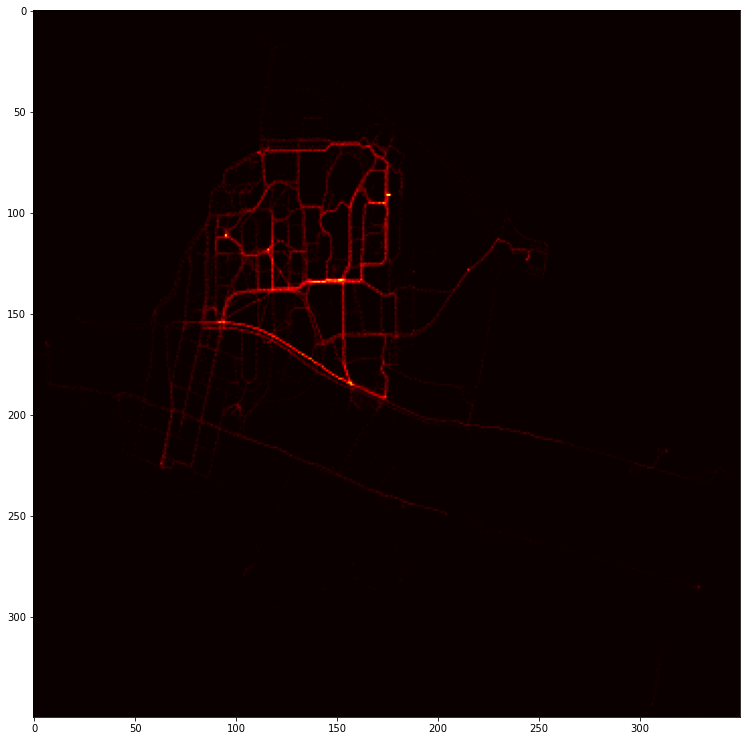

In [89]:
plt.figure(figsize=(13,13))
plt.imshow(points_map,cmap='hot')

In [90]:
with open('heatmap.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(["lon","lat","intensity"])
    for i in range(len(lon_list)):
        for j in range(len(lat_list)):
            write.writerow([lon_list[i],lat_list[j], points_map[i,j]])
f.close()